In [1]:
import time
start = time.time()

Libraries

In [2]:
import pandas as pd 
import numpy as np
import darts 
import yfinance as yf 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from darts.timeseries import TimeSeries
from darts.models import Theta
from darts.metrics import mape
import seaborn as sns
%matplotlib inline
%autosave 1
plt.rcParams["figure.figsize"] = (20,10)

D:\Anaconda\envs\u8darts\lib\site-packages\darts\timeseries.py:39: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.DatetimeIndex, pd.RangeIndex, pd.Int64Index)
D:\Anaconda\envs\u8darts\lib\site-packages\darts\timeseries.py:512: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  times: Union[pd.DatetimeIndex, pd.Int64Index],
D:\Anaconda\envs\u8darts\lib\site-packages\darts\timeseries.py:738: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  def time_index(self) -> Union[pd.DatetimeIndex, pd.Int64Index]:
D:\Anaconda\envs\u8darts\lib\site-packages\darts\timeseries.py:2947: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a

Autosaving every 1 seconds


<hr>

For`5 min ` `15 min` and`30 min` past requires 59 days

For all three time frame model is also the same 

<hr>

   
TimeFrame Selected = 5m
   
   
[*********************100%***********************]  1 of 1 completed
   
   
Cleaning the raw data...
   
Fitting into valid timeseries format...
   
Searching the best theta...
   
The MAPE for the model is: 1.16 %, with theta = 0.50083472454088.
   
Backtesting...
   


  0%|          | 0/3086 [00:00<?, ?it/s]

MAPE for backtesting = 0.21%
 
 


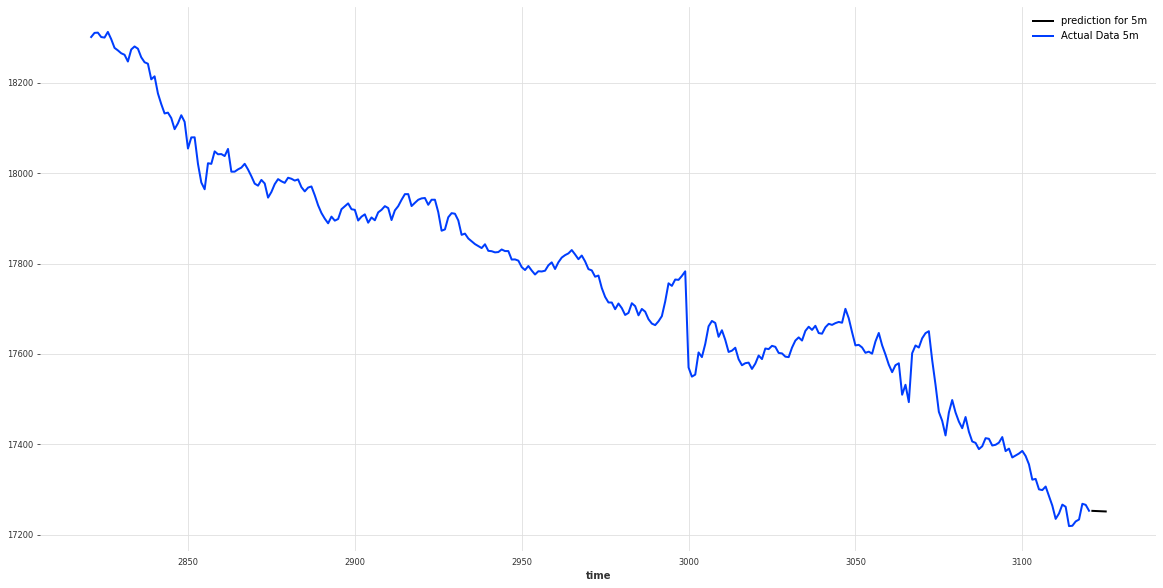

In [8]:
past =59

now = datetime.now()
d = now - timedelta(days=past)
date = d.strftime("%Y-%m-%d")

Time_Frame = '5m'

print('   ')

print(f"TimeFrame Selected = {Time_Frame}")

print('   ')

#downloading dataset from yfinance

print('Downloading the data...')

print('   ')

ticker = yf.download(tickers='^NSEI',interval=Time_Frame,start=date)

print('   ')

print('Downloading Done!')

print('   ')

print('Cleaning the raw data...')

print('   ')

ticker.drop(['Adj Close','Volume'],axis = 1,inplace= True)
data = pd.DataFrame(ticker['Close']).dropna()
data = data.reset_index(drop=True)

print('Fitting into valid timeseries format...')

print('   ')
#converting into timeseris format

data_timeseries = TimeSeries.from_dataframe(data, time_col=None, value_cols=None, fill_missing_dates=False, freq='B', fillna_value=False)

#Splitting into training and testing
length = int(len(data)*(.80))
train, val = data_timeseries[:length], data_timeseries[length:]

# Search for the best theta parameter, by trying different values

print('Searching the best theta...')

print('   ')

thetas = np.linspace(-300, 300, 600)

best_mape = float('inf')
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print('The MAPE for the model is: {:.2f} %, with theta = {}.'.format(mape(val, pred_best_theta), best_theta))


#backtesting 
print('   ')

print('Backtesting...')

print('   ')

#must between 99 and 1

test_for_recent_percentage_data = 99                           

historical_fcast_theta = best_theta_model.historical_forecasts(data_timeseries,
                                                               start=(100-test_for_recent_percentage_data)/100,
                                                               forecast_horizon=5,
                                                               verbose=True)

print('MAPE for backtesting = {:.2f}%'.format(mape(historical_fcast_theta, data_timeseries)))

print(' ')

#my model 
best_theta_model = Theta(best_theta)
best_theta_model.fit(data_timeseries)
prediction = best_theta_model.predict(5)

print(' ')
# plotting the prediction
prediction.plot(label=f"prediction for {Time_Frame}")
data_timeseries[-300:].plot(label=f"Actual Data {Time_Frame}")


<hr>

   
TimeFrame Selected = 15m
   
   
[*********************100%***********************]  1 of 1 completed
   
   
Cleaning the raw data...
   
Fitting into valid timeseries format...
   
Searching the best theta...
   
The MAPE for the model is: 1.19 %, with theta = 0.50083472454088.
   
Backtesting...
 
 


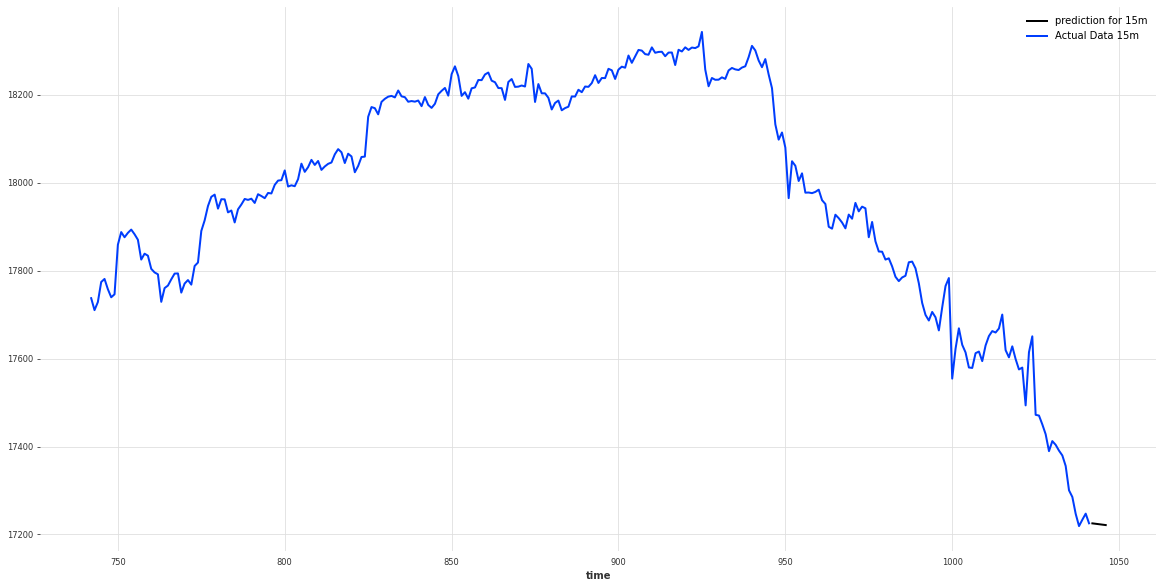

In [9]:
past =59

now = datetime.now()
d = now - timedelta(days=past)
date = d.strftime("%Y-%m-%d")

Time_Frame = '15m'

print('   ')

print(f"TimeFrame Selected = {Time_Frame}")

print('   ')

#downloading dataset from yfinance

print('Downloading the data...')

print('   ')

ticker = yf.download(tickers='^NSEI',interval=Time_Frame,start=date)

print('   ')

print('Downloading Done!')

print('   ')

print('Cleaning the raw data...')

print('   ')

ticker.drop(['Adj Close','Volume'],axis = 1,inplace= True)
data = pd.DataFrame(ticker['Close']).dropna()
data = data.reset_index(drop=True)

print('Fitting into valid timeseries format...')

print('   ')
#converting into timeseris format

data_timeseries = TimeSeries.from_dataframe(data, time_col=None, value_cols=None, fill_missing_dates=False, freq='B', fillna_value=False)

#Splitting into training and testing
length = int(len(data)*(.80))
train, val = data_timeseries[:length], data_timeseries[length:]

# Search for the best theta parameter, by trying different values

print('Searching the best theta...')

print('   ')

thetas = np.linspace(-300, 300, 600)

best_mape = float('inf')
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print('The MAPE for the model is: {:.2f} %, with theta = {}.'.format(mape(val, pred_best_theta), best_theta))


#backtesting 
print('   ')

print('Backtesting...')

# print('   ')

# #must between 99 and 1

# test_for_recent_percentage_data = 99                          

# historical_fcast_theta = best_theta_model.historical_forecasts(data_timeseries,
#                                                                start=(100-test_for_recent_percentage_data)/100,
#                                                                forecast_horizon=5,
#                                                                verbose=True)

# print('MAPE for backtesting = {:.2f}%'.format(mape(historical_fcast_theta, data_timeseries)))

print(' ')

#my model 
best_theta_model = Theta(best_theta)
best_theta_model.fit(data_timeseries)
prediction = best_theta_model.predict(5)

print(' ')
# plotting the prediction
prediction.plot(label=f"prediction for {Time_Frame}")
data_timeseries[-300:].plot(label=f"Actual Data {Time_Frame}")


<hr>

   
TimeFrame Selected = 30m
   
   
[*********************100%***********************]  1 of 1 completed
   
   
Cleaning the raw data...
   
Fitting into valid timeseries format...
   
Searching the best theta...
   
The MAPE for the model is: 1.19 %, with theta = 0.50083472454088.
   
Backtesting...
 
 


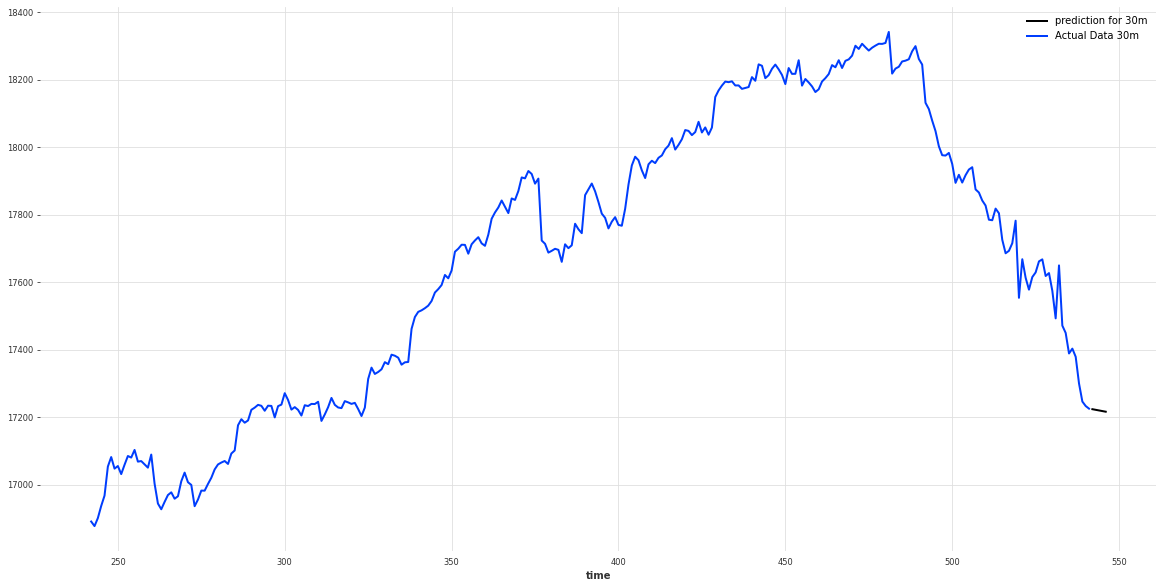

In [10]:
past =59

now = datetime.now()
d = now - timedelta(days=past)
date = d.strftime("%Y-%m-%d")

Time_Frame = '30m'

print('   ')

print(f"TimeFrame Selected = {Time_Frame}")

print('   ')

#downloading dataset from yfinance

print('Downloading the data...')

print('   ')

ticker = yf.download(tickers='^NSEI',interval=Time_Frame,start=date)

print('   ')

print('Downloading Done!')

print('   ')

print('Cleaning the raw data...')

print('   ')

ticker.drop(['Adj Close','Volume'],axis = 1,inplace= True)
data = pd.DataFrame(ticker['Close']).dropna()
data = data.reset_index(drop=True)

print('Fitting into valid timeseries format...')

print('   ')
#converting into timeseris format

data_timeseries = TimeSeries.from_dataframe(data, time_col=None, value_cols=None, fill_missing_dates=False, freq='B', fillna_value=False)

#Splitting into training and testing
length = int(len(data)*(.80))
train, val = data_timeseries[:length], data_timeseries[length:]

# Search for the best theta parameter, by trying different values

print('Searching the best theta...')

print('   ')

thetas = np.linspace(-300, 300, 600)

best_mape = float('inf')
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print('The MAPE for the model is: {:.2f} %, with theta = {}.'.format(mape(val, pred_best_theta), best_theta))


#backtesting 
print('   ')

print('Backtesting...')

# print('   ')

# #must between 99 and 1

# test_for_recent_percentage_data = 99                           

# historical_fcast_theta = best_theta_model.historical_forecasts(data_timeseries,
#                                                                start=(100-test_for_recent_percentage_data)/100,
#                                                                forecast_horizon=5,
#                                                                verbose=True)

# print('MAPE for backtesting = {:.2f}%'.format(mape(historical_fcast_theta, data_timeseries)))

print(' ')

#my model 
best_theta_model = Theta(best_theta)
best_theta_model.fit(data_timeseries)
prediction = best_theta_model.predict(5)

print(' ')
# plotting the prediction
prediction.plot(label=f"prediction for {Time_Frame}")
data_timeseries[-300:].plot(label=f"Actual Data {Time_Frame}")


<hr>

   
TimeFrame Selected = 1h
   
   
[*********************100%***********************]  1 of 1 completed
   
   
Cleaning the raw data...
   
Fitting into valid timeseries format...
   
Searching the best theta...
   
The MAPE for the model is: 2.44 %, with theta = 1.5025041736226967.
   
Backtesting...
   


  0%|          | 0/3400 [00:00<?, ?it/s]

MAPE for backtesting = 0.83%
 
 


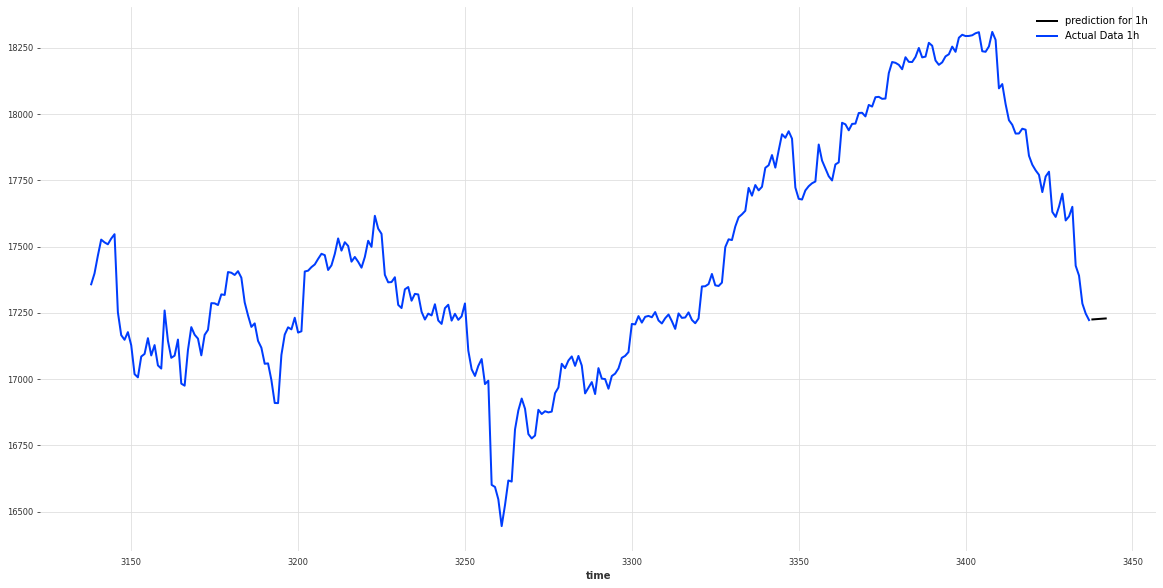

In [11]:
past =729

now = datetime.now()
d = now - timedelta(days=past)
date = d.strftime("%Y-%m-%d")

Time_Frame = '1h'

print('   ')

print(f"TimeFrame Selected = {Time_Frame}")

print('   ')

#downloading dataset from yfinance

print('Downloading the data...')

print('   ')

ticker = yf.download(tickers='^NSEI',interval=Time_Frame,start=date)

print('   ')

print('Downloading Done!')

print('   ')

print('Cleaning the raw data...')

print('   ')

ticker.drop(['Adj Close','Volume'],axis = 1,inplace= True)
data = pd.DataFrame(ticker['Close']).dropna()
data = data.reset_index(drop=True)

print('Fitting into valid timeseries format...')

print('   ')
#converting into timeseris format

data_timeseries = TimeSeries.from_dataframe(data, time_col=None, value_cols=None, fill_missing_dates=False, freq='B', fillna_value=False)

#Splitting into training and testing
length = int(len(data)*(.80))
train, val = data_timeseries[:length], data_timeseries[length:]

# Search for the best theta parameter, by trying different values

print('Searching the best theta...')

print('   ')

thetas = np.linspace(-300, 300, 600)

best_mape = float('inf')
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print('The MAPE for the model is: {:.2f} %, with theta = {}.'.format(mape(val, pred_best_theta), best_theta))


#backtesting 
print('   ')

print('Backtesting...')

print('   ')

#must between 99 and 1

test_for_recent_percentage_data = 99                           

historical_fcast_theta = best_theta_model.historical_forecasts(data_timeseries,
                                                               start=(100-test_for_recent_percentage_data)/100,
                                                               forecast_horizon=5,
                                                               verbose=True)

print('MAPE for backtesting = {:.2f}%'.format(mape(historical_fcast_theta, data_timeseries)))

print(' ')

#my model 
best_theta_model = Theta(best_theta)
best_theta_model.fit(data_timeseries)
prediction = best_theta_model.predict(5)

print(' ')
# plotting the prediction
prediction.plot(label=f"prediction for {Time_Frame}")
data_timeseries[-300:].plot(label=f"Actual Data {Time_Frame}")


<hr>

   
TimeFrame Selected = 1d
   
   
[*********************100%***********************]  1 of 1 completed
   
   
Cleaning the raw data...
   
Fitting into valid timeseries format...
   
Searching the best theta...
   
The MAPE for the model is: 11.98 %, with theta = -1.5025041736226967.
   
Backtesting...
   


  0%|          | 0/3478 [00:00<?, ?it/s]

MAPE for backtesting = 1.91%
 
 


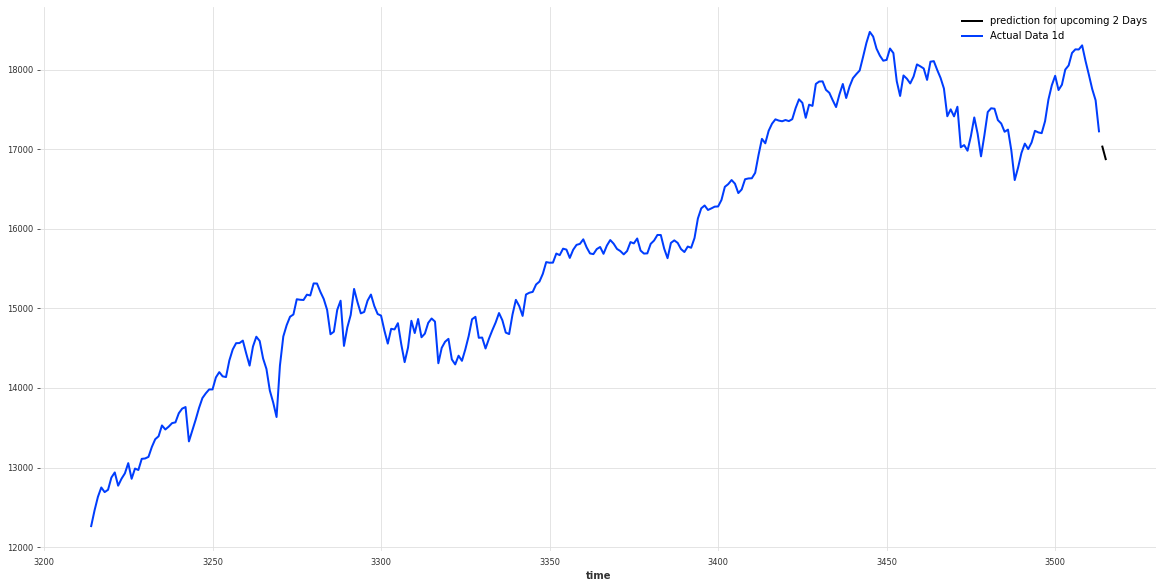

In [12]:
Time_Frame = '1d'

print('   ')

print(f"TimeFrame Selected = {Time_Frame}")

print('   ')

#downloading dataset from yfinance

print('Downloading the data...')

print('   ')

ticker = yf.download(tickers='^NSEI',interval=Time_Frame)

print('   ')

print('Downloading Done!')

print('   ')

print('Cleaning the raw data...')

print('   ')

ticker.drop(['Adj Close','Volume'],axis = 1,inplace= True)
data = pd.DataFrame(ticker['Close']).dropna()
data = data.reset_index(drop=True)

print('Fitting into valid timeseries format...')

print('   ')
#converting into timeseris format

data_timeseries = TimeSeries.from_dataframe(data, time_col=None, value_cols=None, fill_missing_dates=False, freq='B', fillna_value=False)

#Splitting into training and testing
length = int(len(data)*(.80))
train, val = data_timeseries[:length], data_timeseries[length:]

# Search for the best theta parameter, by trying different values

print('Searching the best theta...')

print('   ')

thetas = np.linspace(-300, 300, 600)

best_mape = float('inf')
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta

best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print('The MAPE for the model is: {:.2f} %, with theta = {}.'.format(mape(val, pred_best_theta), best_theta))


#backtesting 
print('   ')

print('Backtesting...')

print('   ')

#must between 99 and 1

test_for_recent_percentage_data = 99                           

forecast_horizon = 2

historical_fcast_theta = best_theta_model.historical_forecasts(data_timeseries,
                                                               start=(100-test_for_recent_percentage_data)/100,
                                                               forecast_horizon=forecast_horizon,
                                                               verbose=True)

print('MAPE for backtesting = {:.2f}%'.format(mape(historical_fcast_theta, data_timeseries)))

print(' ')

#my model 
best_theta_model = Theta(best_theta)
best_theta_model.fit(data_timeseries)
prediction = best_theta_model.predict(forecast_horizon)

print(' ')
# plotting the prediction
prediction.plot(label=f"prediction for upcoming {forecast_horizon} Days")
data_timeseries[-300:].plot(label=f"Actual Data {Time_Frame}")


In [13]:
end = time.time()
intervals = (
    ('weeks', 604800),  # 60 * 60 * 24 * 7
    ('days', 86400),    # 60 * 60 * 24
    ('hours', 3600),    # 60 * 60
    ('minutes', 60),
    ('seconds', 1),
)

def display_time(seconds, granularity=2):
    result = []

    for name, count in intervals:
        value = seconds // count
        if value:
            seconds -= value * count
            if value == 1:
                name = name.rstrip('s')
            result.append("{} {}".format(value, name))
    print(f"The time taken to run the notebook is :")
    print(' '.join(result[:granularity]))

display_time(end-start)

The time taken to run the notebook is :
3.0 minutes 11.0 seconds
